In [7]:
# 1. Data Preparation

import os
import shutil
from sklearn.model_selection import train_test_split

# Define the base directory and dataset path
base_dir = '/Users/halimsmacbookairm1/Documents/GitHub/csc3107-group26-p3-ml-brain-mri-classification'
dataset_dir = os.path.join(base_dir, 'dataset_26')

# Create new directories for train, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)

# Define classes
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Split dataset into train, validation, and test sets
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(cls_dir)
    train_imgs, val_test_imgs = train_test_split(images, test_size=0.4, random_state=42)
    val_imgs, test_imgs = train_test_split(val_test_imgs, test_size=0.5, random_state=42)
    
    # Create class directories in train, val, and test directories
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(val_dir, cls))
    create_dir(os.path.join(test_dir, cls))
    
    # Copy images to the respective directories
    for img in train_imgs:
        shutil.copy(os.path.join(cls_dir, img), os.path.join(train_dir, cls, img))
    
    for img in val_imgs:
        shutil.copy(os.path.join(cls_dir, img), os.path.join(val_dir, cls, img))
    
    for img in test_imgs:
        shutil.copy(os.path.join(cls_dir, img), os.path.join(test_dir, cls, img))

print("Dataset split into train, validation, and test sets.")

Dataset split into train, validation, and test sets.


In [8]:
# 2. Data Loading

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data loading
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 288 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


In [17]:
# Print the number of samples to ensure data is correctly loaded
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")

Number of training samples: 288
Number of validation samples: 96


In [18]:
# 3. Model Building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# Define the model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 classes: glioma, meningioma, notumor, pituitary
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 4. Model Training

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=25,  # Adjust the number of epochs as needed
    verbose=1  # Increase verbosity for debugging
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.3028 - loss: 1.5107 - val_accuracy: 0.4896 - val_loss: 1.1547
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25


2024-05-24 01:47:50.234804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:47:50.240945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.4946 - loss: 1.1202 - val_accuracy: 0.6354 - val_loss: 0.8982
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25


2024-05-24 01:47:53.814536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:47:53.816688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.6653 - loss: 0.8330 - val_accuracy: 0.6875 - val_loss: 0.7749
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25


2024-05-24 01:47:57.249073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:47:57.251146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.7566 - loss: 0.6397 - val_accuracy: 0.6875 - val_loss: 0.7652
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25


2024-05-24 01:48:00.473211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:00.474883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.8199 - loss: 0.4727 - val_accuracy: 0.7708 - val_loss: 0.5696
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/25


2024-05-24 01:48:03.656629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:03.658670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.8391 - loss: 0.4114 - val_accuracy: 0.7292 - val_loss: 0.5381
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/25


2024-05-24 01:48:06.960537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:06.962605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.9121 - loss: 0.2148 - val_accuracy: 0.7708 - val_loss: 0.6016
Epoch 14/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/25


2024-05-24 01:48:10.181788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:10.183428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.9457 - loss: 0.1679 - val_accuracy: 0.7500 - val_loss: 0.5731
Epoch 16/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/25


2024-05-24 01:48:13.612742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:13.614834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.9680 - loss: 0.1061 - val_accuracy: 0.7708 - val_loss: 0.6089
Epoch 18/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/25


2024-05-24 01:48:16.993788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:16.996255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.9826 - loss: 0.0693 - val_accuracy: 0.7292 - val_loss: 0.9010
Epoch 20/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/25


2024-05-24 01:48:20.204670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:20.206323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.9627 - loss: 0.1769 - val_accuracy: 0.8229 - val_loss: 0.5197
Epoch 22/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/25


2024-05-24 01:48:23.422799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:23.425032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.9827 - loss: 0.0714 - val_accuracy: 0.8229 - val_loss: 0.6405
Epoch 24/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/25


2024-05-24 01:48:26.905231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-24 01:48:26.907349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.9844 - loss: 0.0734 - val_accuracy: 0.7083 - val_loss: 0.7027


In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6849 - loss: 1.3896
Test Accuracy: 66.67%


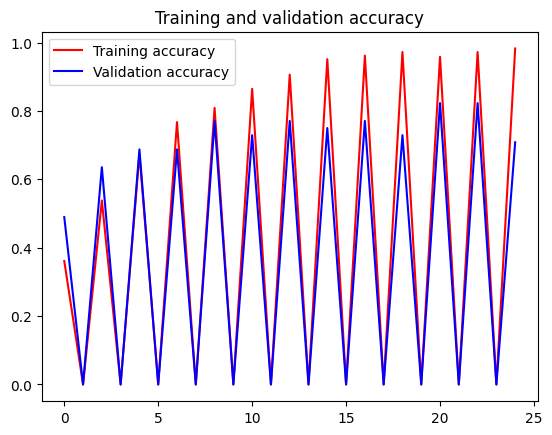

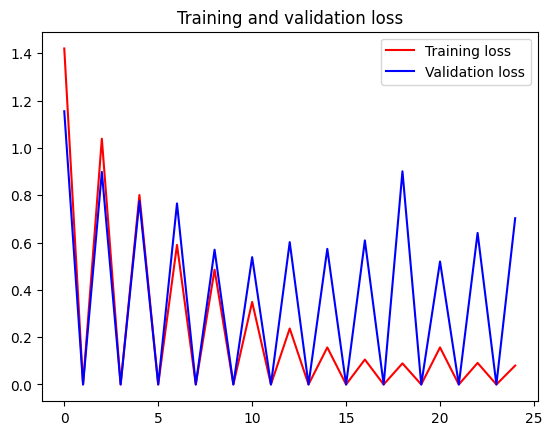

In [21]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()